<a href="https://colab.research.google.com/github/Leandro2402-bit/TAM/blob/main/ReduccionDimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado - reducción de dimensión

- Se presentan los conceptos y simulaciones básicas relacionadas con técnicas clásicas lineales y no lineales de reducción de dimensión.

## Análisis de componentes de principales - Principal Component Analysis (PCA)

![gifpca](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*TXIbCytfgo5p5hty.gif)


- PCA busca un espacio de menor dimensión que preserve la mayor cantidad de variabilidad posible desde el espacio original (alta dimensión).

- Desde una perspectiva generativa, PCA asume que los datos $\mathbf{X} \in \mathbb{R}^{N \times P}$ son generados desde un espacio de baja dimensión (espacio latente) $\mathbf{Z} \in \mathbb{R}^{N \times M}$, donde $M < P$:

\begin{equation}
\mathbf{X} = \mathbf{Z} \mathbf{W}^T,
\end{equation}

- $\mathbf{Z}=\mathbf{X}\mathbf{W}$: matriz de baja dimensión.
- $\mathbf{W} \in \mathbb{R}^{P \times M}$: componentes principales (loading vectors).

El problema de optimización desde el punto de vista generativo:

\begin{align}
\mathbf{W}^*=&\arg\min_\mathbf{W} \|\mathbf{X}-\mathbf{Z} \mathbf{W}^T\|_F \\
   \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}



- PCA también puede resolverse maximizando la varianza de los datos proyectados.

- Asumiendo datos centralizados $\mathbf{X}$, la covarianza $\mathbf{\Sigma}\in \mathbb{R}^{P \times P}$ se define como:

\begin{equation}
\mathbf{\Sigma} = \frac{1}{N} \mathbf{X}^T \mathbf{X}.
\end{equation}

- El problema de optimización de PCA se puede reescribir como:

\begin{align}
\mathbf{W}^*=&\arg\max_\mathbf{W} \text{tr}(\mathbf{W}^T \mathbf{\Sigma} \mathbf{W}),\\
 \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}


- La solución del problema se centra en los $M$ vectores propios de la matriz de covarianza, correspodiente a los $M$ valores propios más altos.

- Ver la demostración [PCA generativo a PCA por varianza](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf).


**Ejemplo:** Construyamos un conjunto de datos 3D del famoso dato sintético rollo Suizo - Swiss Roll.

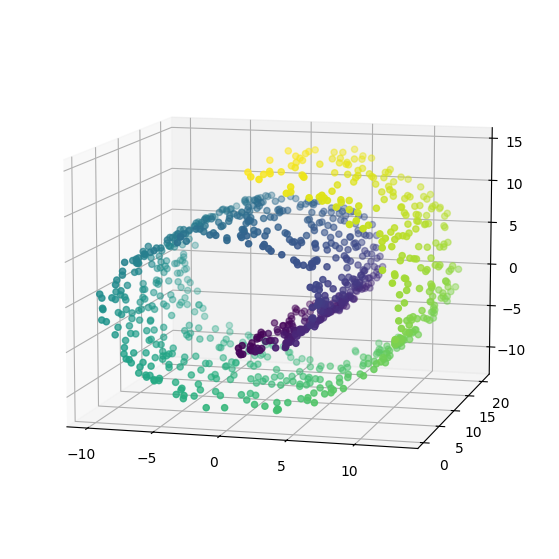

In [1]:
from sklearn.datasets import make_swiss_roll
import numpy as np
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
#t contiene el orden estructural de los datos
#crear scatter en 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

**NOTA:** PCA supone que el conjunto de datos se centra en el origen. Como veremos, las clases de PCA de Scikit-Learn se encargan de centrar los datos por usted. Sin embargo, si implementa PCA usted mismo, o si usa otras bibliotecas, **no olvide centrar los datos primero**, incluso considere aplicar normalización zscore.

**Usando PCA de scikit-learn**

-La clase PCA de Scikit-Learn implementa PCA usando la descomposición espectral (EIG y SVD).

-El siguiente código aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones (tenga en cuenta que automáticamente se encarga de centrar los datos):

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
Y2D = pca.fit_transform(X)

- El hiperparámetro `n_components` puede ser un número entero (número de dimensiones o componentes $M\leq P$) o un valor en el intervalo [0,1] para cuantificar el número de componentes requerido para preservar una varianza retenida dada.

Tenga en cuenta que ejecutar PCA varias veces en conjuntos de datos ligeramente diferentes puede generar espacios latentes distintos. En general, la única diferencia es que algunos ejes pueden voltearse.

**Nota**: el problema de optimización de PCA que incluye costo y restricciones cuadráticas, da como resultado un problema no convexo.

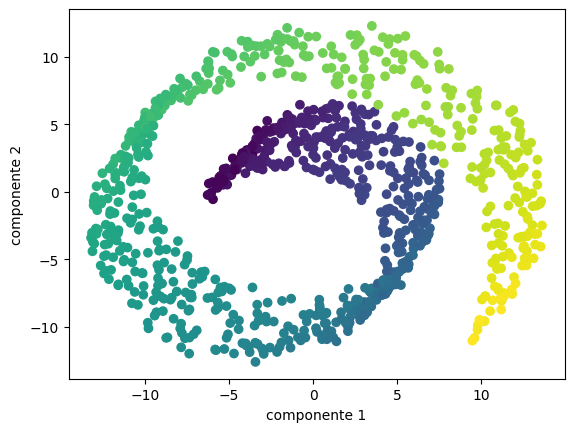

In [3]:
plt.scatter(Y2D[:,0],Y2D[:,1],c=t)
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.show()

Ahora vamos a recuperar los puntos 3D proyectados en el plano (subespacio PCA 2D).

In [4]:
X3D_inv = pca.inverse_transform(Y2D)

Por supuesto, **hubo cierta pérdida de información durante el paso de proyección**, por lo que los puntos 3D recuperados *no son exactamente iguales a los puntos 3D originales*:

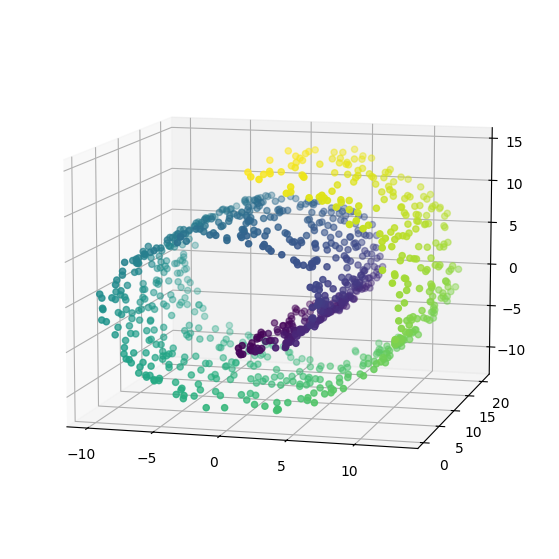

In [5]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

Podemos calcular el error de reconstrucción:

In [6]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

np.float64(4.751275566890726e-29)

Las reconstrucciones de ambos métodos **no son idénticas** porque la clase PCA de Scikit-Learn se encarga automáticamente de revertir el centrado medio, *pero si restamos la media, obtenemos la misma reconstrucción*.

El objeto PCA da acceso a los componentes principales que calculó:

In [7]:
pca.components_

array([[ 0.56791312,  0.15670748,  0.80803308],
       [ 0.77712377,  0.2213858 , -0.5891239 ],
       [-0.27120717,  0.96251291,  0.00394679]])

# Ejercicio 1

- Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



# PCA: Enfoque Generativo vs Preservación de Varianza

## 1. PCA como Algoritmo Generativo (Reconstrucción)

### Formulación del Problema de Optimización

En el enfoque **generativo**, PCA se plantea como un problema de **reconstrucción óptima** de los datos originales.

**Objetivo**: Encontrar una representación de menor dimensión que permita reconstruir los datos originales con el mínimo error cuadrático.

### Formulación Matemática

Dado un conjunto de datos **X ∈ ℝⁿˣᵈ** (n muestras, d dimensiones), queremos:

1. **Codificar**: X → Z (dimensión reducida k < d)
2. **Decodificar**: Z → X̂ (reconstrucción)

**Función Objetivo (Generativa)**:
```
min ||X - X̂||²_F = min ||X - ZW^T||²_F
W,Z                   W,Z
```

Donde:
- **Z ∈ ℝⁿˣᵏ**: representación en espacio reducido
- **W ∈ ℝᵈˣᵏ**: matriz de decodificación/reconstrucción
- **X̂ = ZW^T**: datos reconstruidos

### Constraintes del Problema Generativo

Para evitar soluciones triviales, se impone:
```
W^T W = I_k  (ortonormalidad de las columnas de W)
```

## 2. PCA como Preservación de Varianza

### Formulación del Problema de Optimización

En el enfoque de **preservación de varianza**, PCA busca las direcciones que **maximizan la varianza** de los datos proyectados.

**Objetivo**: Encontrar las direcciones principales que capturen la máxima variabilidad de los datos.

### Formulación Matemática

**Función Objetivo (Preservación de Varianza)**:
```
max Tr(W^T C W)  sujeto a W^T W = I_k
 W
```

Donde:
- **C = (1/n)X^T X**: matriz de covarianza
- **Tr(·)**: traza de la matriz
- **W**: matriz de direcciones principales

## 3. Comparación de Ambos Enfoques

### Equivalencia Matemática

**Teorema**: Ambas formulaciones son **matemáticamente equivalentes** y conducen a la misma solución.

### Demostración de Equivalencia

**Paso 1 - Minimización del Error de Reconstrucción**:
```
min ||X - ZW^T||²_F = min ||X||²_F - 2Tr(X^T ZW^T) + ||ZW^T||²_F
W,Z                   W,Z
```

**Paso 2 - Solución Óptima para Z**:
Para W fijo, la solución óptima es: **Z* = XW**

**Paso 3 - Sustitución**:
```
min ||X - XWW^T||²_F = ||X||²_F - ||XWW^T||²_F
 W                   = ||X||²_F - Tr(W^T X^T XW)
```

**Paso 4 - Equivalencia**:
```
min ||X - XWW^T||²_F ≡ max Tr(W^T X^T XW) ≡ max Tr(W^T C W)
 W                      W                     W
```

### Diferencias Conceptuales

| Aspecto | Enfoque Generativo | Preservación de Varianza |
|---------|-------------------|-------------------------|
| **Objetivo** | Minimizar error de reconstrucción | Maximizar varianza preservada |
| **Interpretación** | Filtrado/compresión óptima | Análisis de variabilidad |
| **Aplicación** | Denoising, compresión | Análisis exploratorio |
| **Ventaja** | Intuición clara de pérdida | Interpretación estadística |

### Interpretación Geométrica

**Enfoque Generativo**:
- Busca el **subespacio k-dimensional** que mejor aproxima los datos
- Minimiza la **distancia perpendicular** al subespacio

**Preservación de Varianza**:
- Encuentra las **direcciones de máxima dispersión**
- Proyecta sobre el subespacio de mayor variabilidad

## 4. Ventajas de Cada Perspectiva

### Enfoque Generativo
- **Aplicaciones prácticas**: denoising, compresión, imputación
- **Extensibilidad**: fácil generalización a autoencoders
- **Interpretación**: pérdida de información cuantificable

### Preservación de Varianza
- **Análisis estadístico**: comprensión de la estructura de datos
- **Selección de componentes**: criterios basados en varianza explicada
- **Teoría clásica**: conexión con análisis multivariado

## 5. Algoritmo de Solución

### Método de los Autovectores
1. Calcular matriz de covarianza: **C = (1/n)X^T X**
2. Encontrar autovectores y autovalores: **Cv_i = λ_i v_i**
3. Ordenar por autovalores decrecientes: **λ₁ ≥ λ₂ ≥ ... ≥ λᵈ**
4. Seleccionar primeros k autovectores: **W = [v₁, v₂, ..., vₖ]**

### Propiedades de la Solución
- **Autovalores**: representan la varianza en cada componente principal
- **Autovectores**: direcciones de máxima varianza (ortonormales)
- **Varianza explicada**: Σᵢ₌₁ᵏ λᵢ / Σᵢ₌₁ᵈ λᵢ

ANÁLISIS COMPARATIVO: ENFOQUES DE PCA
=== ENFOQUE GENERATIVO: Minimización del Error de Reconstrucción ===

Datos originales: (200, 3)
Matriz de covarianza:
[[ 1.00502513 -0.70117792 -0.60466904]
 [-0.70117792  1.00502513  0.93195674]
 [-0.60466904  0.93195674  1.00502513]]

Convergencia alcanzada en iteración 7
Error de reconstrucción final: 12.635437
Componentes principales (W):
[[-0.79540182  0.59002107]
 [-0.30725423 -0.58966787]
 [-0.52242779 -0.55151332]]

=== COMPARACIÓN CON SOLUCIÓN ANALÍTICA ===
Componentes PCA (autovectores):
[[-0.52444679  0.61237398  0.59156882]
 [ 0.84008575  0.25905747  0.47659749]]
Error de reconstrucción PCA: 12.635437
Diferencia en error: 0.00000000


=== ENFOQUE PRESERVACIÓN DE VARIANZA ===

Autovalores (varianza de cada componente):
  PC1: 2.5058
  PC2: 0.4458
  PC3: 0.0635

Varianza total: 3.0151

Porcentaje de varianza explicada:
  PC1: 83.1% (acumulado: 83.1%)
  PC2: 14.8% (acumulado: 97.9%)
  PC3: 2.1% (acumulado: 100.0%)

Con 2 componentes se pr

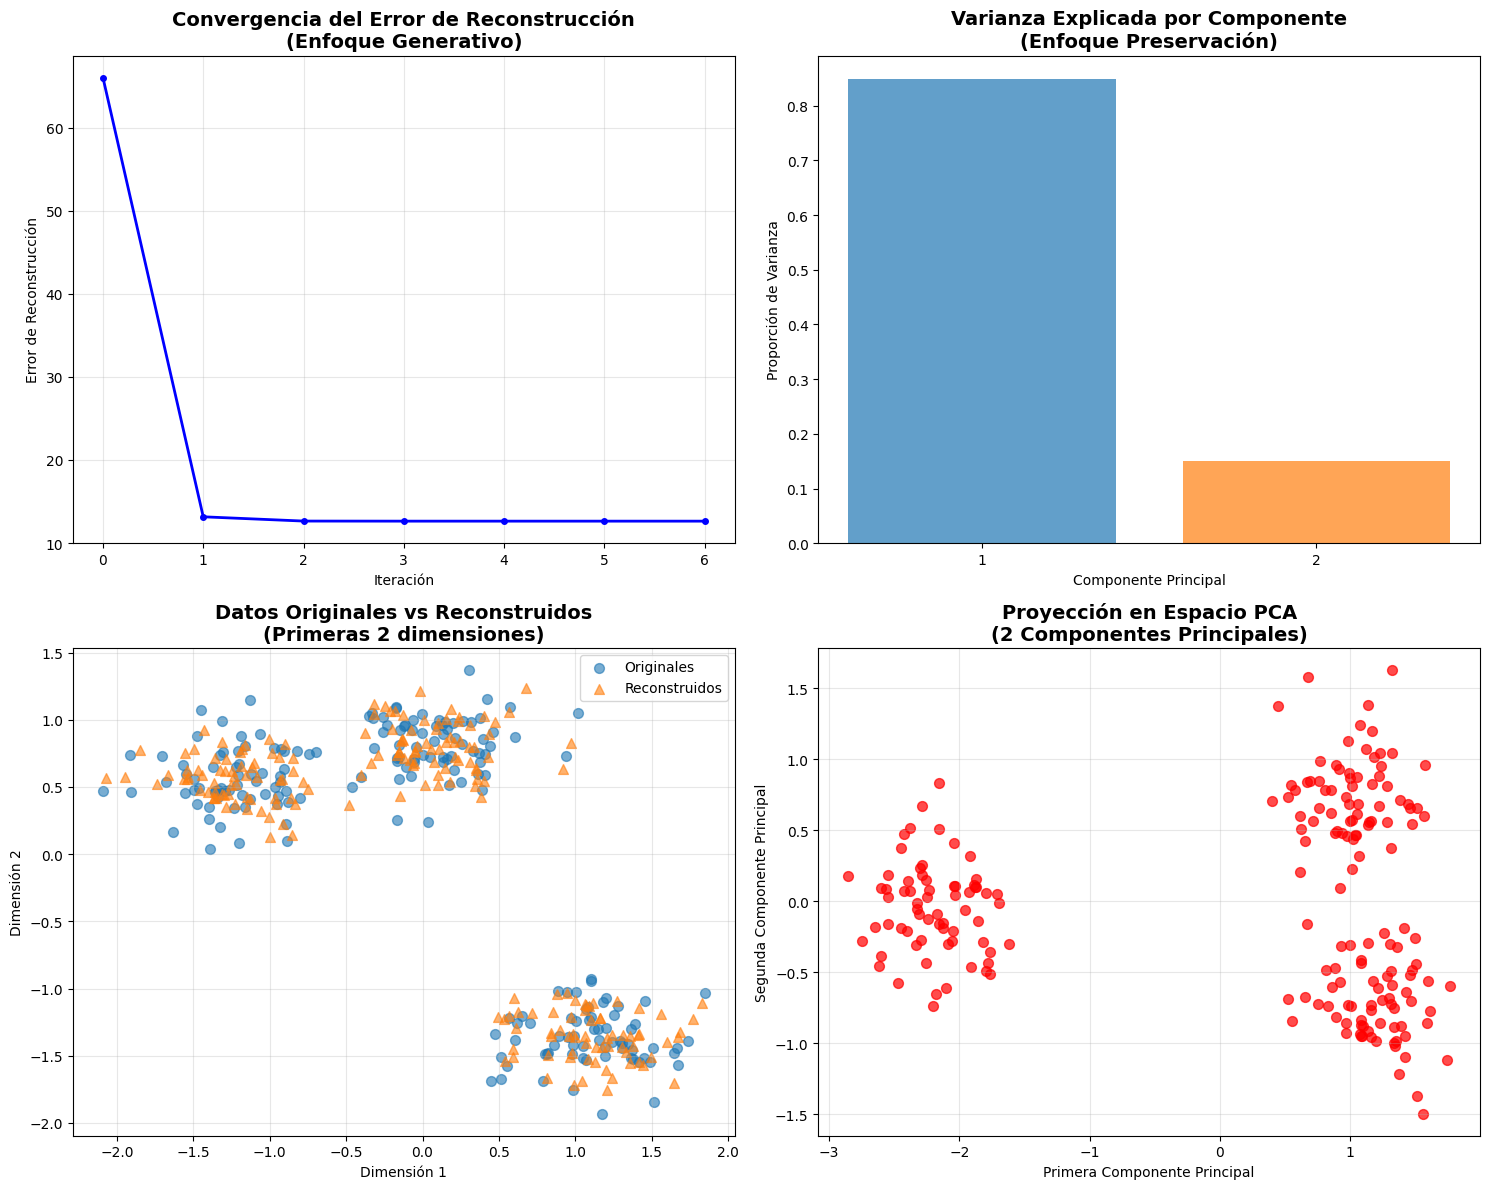


Análisis completado. ¡Ambos enfoques son matemáticamente equivalentes!


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

class PCAComparison:
    """
    Implementación de PCA desde dos perspectivas:
    1. Enfoque Generativo (minimización del error de reconstrucción)
    2. Preservación de Varianza (maximización de varianza)
    """

    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components_ = None
        self.explained_variance_ = None
        self.mean_ = None

    def fit(self, X):
        """Ajusta PCA usando descomposición en autovalores"""
        # Centrar los datos
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_

        # Calcular matriz de covarianza
        cov_matrix = np.cov(X_centered.T)

        # Descomposición en autovalores y autovectores
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Ordenar por autovalores decrecientes
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Seleccionar componentes principales
        self.components_ = eigenvectors[:, :self.n_components].T
        self.explained_variance_ = eigenvalues[:self.n_components]

        return self

    def transform(self, X):
        """Proyecta datos al espacio de menor dimensión"""
        X_centered = X - self.mean_
        return np.dot(X_centered, self.components_.T)

    def inverse_transform(self, Z):
        """Reconstruye datos desde el espacio reducido"""
        return np.dot(Z, self.components_) + self.mean_

    def reconstruction_error(self, X):
        """Calcula el error de reconstrucción (enfoque generativo)"""
        Z = self.transform(X)
        X_reconstructed = self.inverse_transform(Z)
        return np.sum((X - X_reconstructed) ** 2)

    def explained_variance_ratio(self):
        """Calcula la proporción de varianza explicada"""
        total_variance = np.sum(self.explained_variance_)
        return self.explained_variance_ / total_variance

def generative_optimization_demo():
    """
    Demostración del enfoque generativo:
    Minimización iterativa del error de reconstrucción
    """
    print("=== ENFOQUE GENERATIVO: Minimización del Error de Reconstrucción ===\n")

    # Generar datos sintéticos
    np.random.seed(42)
    X, _ = make_blobs(n_samples=200, centers=3, n_features=3,
                      random_state=42, cluster_std=1.5)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    print(f"Datos originales: {X.shape}")
    # Remove the format specifier from the print statement
    print(f"Matriz de covarianza:\n{np.cov(X.T)}\n")

    # Implementación iterativa del enfoque generativo
    def optimize_reconstruction(X, k, max_iter=100, tol=1e-6):
        n, d = X.shape

        # Inicialización aleatoria
        W = np.random.randn(d, k)
        W, _ = np.linalg.qr(W)  # Ortonormalizar

        errors = []

        for iteration in range(max_iter):
            # Paso 1: Optimizar Z dado W
            Z = X @ W

            # Paso 2: Optimizar W dado Z
            # Solución analítica: W = V_k de SVD(X^T Z)
            U, s, Vt = np.linalg.svd(X.T @ Z, full_matrices=False)
            W = U @ Vt

            # Calcular error de reconstrucción
            X_recon = Z @ W.T
            error = np.sum((X - X_recon) ** 2)
            errors.append(error)

            # Criterio de convergencia
            if iteration > 0 and abs(errors[-2] - errors[-1]) < tol:
                print(f"Convergencia alcanzada en iteración {iteration + 1}")
                break

        return W, Z, errors

    # Optimización iterativa
    W_opt, Z_opt, errors = optimize_reconstruction(X, k=2)

    print(f"Error de reconstrucción final: {errors[-1]:.6f}")
    print(f"Componentes principales (W):\n{W_opt}\n")

    # Comparar con solución analítica (autovectores)
    pca = PCAComparison(n_components=2)
    pca.fit(X)

    print("=== COMPARACIÓN CON SOLUCIÓN ANALÍTICA ===")
    print(f"Componentes PCA (autovectores):\n{pca.components_}")
    print(f"Error de reconstrucción PCA: {pca.reconstruction_error(X):.6f}")
    print(f"Diferencia en error: {abs(errors[-1] - pca.reconstruction_error(X)):.8f}\n")

    return errors, pca, X

def variance_preservation_demo():
    """
    Demostración del enfoque de preservación de varianza
    """
    print("=== ENFOQUE PRESERVACIÓN DE VARIANZA ===\n")

    # Usar los mismos datos
    np.random.seed(42)
    X, _ = make_blobs(n_samples=200, centers=3, n_features=3,
                      random_state=42, cluster_std=1.5)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Análisis de varianza
    pca = PCAComparison(n_components=3)  # Todas las componentes
    pca.fit(X)

    print("Autovalores (varianza de cada componente):")
    for i, var in enumerate(pca.explained_variance_):
        print(f"  PC{i+1}: {var:.4f}")

    print(f"\nVarianza total: {np.sum(pca.explained_variance_):.4f}")

    print("\nPorcentaje de varianza explicada:")
    ratios = pca.explained_variance_ratio()
    cumulative = np.cumsum(ratios)

    for i, (ratio, cum) in enumerate(zip(ratios, cumulative)):
        print(f"  PC{i+1}: {ratio:.1%} (acumulado: {cum:.1%})")

    # Criterio de selección de componentes
    print(f"\nCon 2 componentes se preserva {cumulative[1]:.1%} de la varianza")

    return pca, ratios

def visualization_comparison(errors, pca, X):
    """Visualización de ambos enfoques"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Convergencia del algoritmo generativo
    axes[0,0].plot(errors, 'b-', linewidth=2, marker='o', markersize=4)
    axes[0,0].set_title('Convergencia del Error de Reconstrucción\n(Enfoque Generativo)',
                       fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Iteración')
    axes[0,0].set_ylabel('Error de Reconstrucción')
    axes[0,0].grid(True, alpha=0.3)

    # 2. Varianza explicada por componente
    ratios = pca.explained_variance_ratio()
    axes[0,1].bar(range(1, len(ratios)+1), ratios,
                  color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
    axes[0,1].set_title('Varianza Explicada por Componente\n(Enfoque Preservación)',
                       fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Componente Principal')
    axes[0,1].set_ylabel('Proporción de Varianza')
    axes[0,1].set_xticks(range(1, len(ratios)+1))

    # 3. Datos originales vs reconstruidos
    Z = pca.transform(X)
    X_recon = pca.inverse_transform(Z)

    axes[1,0].scatter(X[:, 0], X[:, 1], alpha=0.6, label='Originales', s=50)
    axes[1,0].scatter(X_recon[:, 0], X_recon[:, 1], alpha=0.6,
                     label='Reconstruidos', s=50, marker='^')
    axes[1,0].set_title('Datos Originales vs Reconstruidos\n(Primeras 2 dimensiones)',
                       fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Dimensión 1')
    axes[1,0].set_ylabel('Dimensión 2')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # 4. Proyección en espacio PCA
    axes[1,1].scatter(Z[:, 0], Z[:, 1], c='red', alpha=0.7, s=50)
    axes[1,1].set_title('Proyección en Espacio PCA\n(2 Componentes Principales)',
                       fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Primera Componente Principal')
    axes[1,1].set_ylabel('Segunda Componente Principal')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig

def mathematical_equivalence_proof():
    """Demostración numérica de la equivalencia matemática"""
    print("=== DEMOSTRACIÓN DE EQUIVALENCIA MATEMÁTICA ===\n")

    # Generar datos pequeños para demostración clara
    np.random.seed(123)
    X = np.random.randn(5, 3)
    X = (X - np.mean(X, axis=0))  # Centrar

    print("Datos de ejemplo (centrados):")
    print(X)
    print()

    # Método 1: Minimización del error de reconstrucción
    pca1 = PCAComparison(n_components=2)
    pca1.fit(X + np.mean(X, axis=0))  # Añadir media para que fit() la centre

    reconstruction_error = pca1.reconstruction_error(X + np.mean(X, axis=0))

    print("Método 1 - Minimización Error de Reconstrucción:")
    print(f"Error de reconstrucción: {reconstruction_error:.8f}")
    print(f"Componentes principales:\n{pca1.components_}")
    print()

    # Método 2: Maximización de varianza
    C = np.cov(X.T)  # Matriz de covarianza
    eigenvals, eigenvecs = np.linalg.eigh(C)

    # Ordenar por autovalores decrecientes
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]

    # Seleccionar primeras 2 componentes
    W_variance = eigenvecs[:, :2].T

    preserved_variance = np.sum(eigenvals[:2])
    total_variance = np.sum(eigenvals)

    print("Método 2 - Maximización de Varianza:")
    print(f"Varianza preservada: {preserved_variance:.8f}")
    print(f"Varianza total: {total_variance:.8f}")
    print(f"Componentes principales:\n{W_variance}")
    print()

    # Verificar equivalencia
    print("=== VERIFICACIÓN DE EQUIVALENCIA ===")

    # Las componentes deben ser iguales (o diferir solo en signo)
    diff = np.abs(np.abs(pca1.components_) - np.abs(W_variance))
    print(f"Diferencia máxima en componentes: {np.max(diff):.10f}")

    # La relación: Error_reconstrucción = Varianza_total - Varianza_preservada
    expected_error = total_variance - preserved_variance
    print(f"Error esperado (Var_total - Var_preservada): {expected_error:.8f}")
    print(f"Error calculado (reconstrucción): {reconstruction_error:.8f}")
    print(f"Diferencia: {abs(expected_error - reconstruction_error):.10f}")

    if np.max(diff) < 1e-8 and abs(expected_error - reconstruction_error) < 1e-8:
        print("\n✅ EQUIVALENCIA MATEMÁTICA DEMOSTRADA")
    else:
        print("\n❌ Diferencias numéricas detectadas")

# Ejecutar todas las demostraciones
if __name__ == "__main__":
    print("ANÁLISIS COMPARATIVO: ENFOQUES DE PCA")
    print("=" * 50)

    # 1. Demostración generativa
    errors, pca, X = generative_optimization_demo()

    print("\n" + "=" * 50)

    # 2. Demostración preservación de varianza
    pca_var, ratios = variance_preservation_demo()

    print("\n" + "=" * 50)

    # 3. Equivalencia matemática
    mathematical_equivalence_proof()

    print("\n" + "=" * 50)

    # 4. Visualización
    print("Generando visualizaciones...")
    fig = visualization_comparison(errors, pca, X)

    print("\nAnálisis completado. ¡Ambos enfoques son matemáticamente equivalentes!")

### Varianza retenida (explicada)

- El valor propio relacionado con cada compoenente, codifica la varianza retenida del espacio de entrada.

Por ejemplo, veamos las razones de varianza explicadas de los dos primeros componentes del conjunto de datos 3D representados

In [9]:
pca.explained_variance_ratio()

array([0.84897522, 0.15102478])


Esto le indica que **el 40.8% de la varianza del conjunto de datos se encuentra a lo largo del primer eje**, y el **30.2% se encuentra a lo largo del segundo eje**.

### Determinar el número de dimensiones proyectas

El siguiente código calcula PCA sin reducir la dimensionalidad, luego calcula el número mínimo de dimensiones requeridas para preservar el 95% de la variación del conjunto de entrenamiento (se utilizará la base de datos Mnist que tiene 784 dimensiones de entrada).

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

print(X.shape,y.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784) (60000,)


In [11]:
#se submuestrea para facilidad en cálculos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)
print(X_train.shape,y_train.shape)

(1200, 784) (1200,)


In [12]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d      = np.argmax(cumsum >= 0.95) + 1 #varianza acumulada ordenando componentes
d

np.int64(135)

También podemos establecer *n_components = d* y ejecutar PCA nuevamente. Sin embargo, hay una opción mucho mejor: en lugar de especificar el número de componentes principales que desea conservar, puede establecer *n_components* para que sea flotante entre 0.0 y 1.0, lo que indica la relación de varianza que desea conservar:

In [13]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

In [14]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9503404973326779)

- Otra opción más es **trazar la varianza explicada en función del número de dimensiones** (simplemente trazar *cumsum*; ver Figura a continuación).

- Por lo general, habrá un codo en la curva, donde la variación explicada deja de crecer rápidamente. Puede pensar en esto como la dimensionalidad intrínseca del conjunto de datos.

- En este caso, puede ver que reducir la dimensionalidad a unas 100 dimensiones no perdería demasiada varianza explicada.

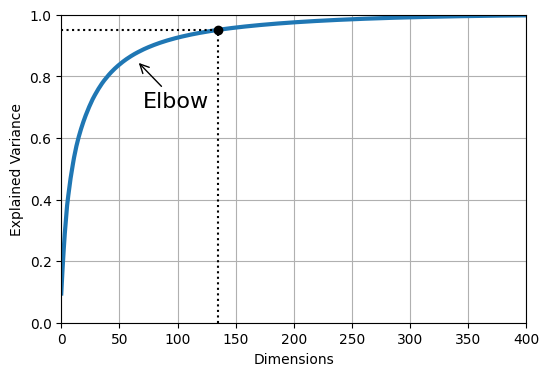

In [15]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### PCA para compresión de datos

 **Ejemplo:** intentemos aplicar PCA al conjunto de datos MNIST mientras conserva el $95\%$ de su varianza.

Debería encontrar que cada instancia tendrá un poco más de $150$ características, en lugar de las características $784$ originales.

In [16]:
pca       = PCA(n_components=0.95)
X_train = np.array(X_train)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

- Entonces, aunque se conserva la mayor parte de la variación, ¡el conjunto de datos ahora es inferior al $20\%$ de su tamaño original!.

- Esta es una relación de compresión razonable, y podemos ver cómo esto puede acelerar enormemente un algoritmo de clasificación (como un clasificador SVM).

**Ejemplo:** En el siguiente código se comprime el conjunto de datos MNIST a $154$ dimensiones, luego usa el método *inverse_transform()* para descomprimirlo nuevamente a $784$ dimensiones. La  siguiente Figura muestra algunos dígitos del conjunto de entrenamiento original (a la izquierda) y los dígitos correspondientes después de la compresión y descompresión. Puede ver que hay una ligera pérdida de calidad de imagen, pero los dígitos aún están casi intactos.

(30, 784)
(30, 784)


Text(0.5, 1.0, 'Compressed')

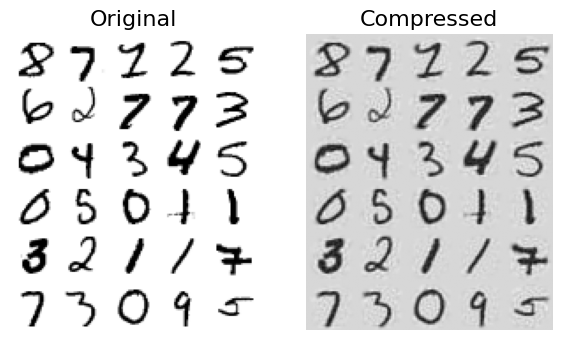

In [17]:
import matplotlib as mpl

pca         = PCA(n_components = 154)
X_reduced   = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size           = 28
    images_per_row = min(len(instances), images_per_row)
    print(instances.shape)
    images         = [instance.reshape(size,size) for instance in instances]
    n_rows         = (len(instances) - 1) // images_per_row + 1
    row_images     = []
    n_empty        = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::40])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::40])
plt.title("Compressed", fontsize=16)
#save_fig("mnist_compression_plot")

In [18]:
rnd_pca   = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

- El algoritmo Kernel PCA permite calcular los componentes principales a partir de un mapeo no lineal basado en funciones núcleo.

- En KPCA los datos en $\mathbf{X}$ son mapeados a un espacio de alta dimensión desde la función $\phi: \mathbb{R}^P \to \mathscr{F}$.

- Luego, se encuentran los componentes principales sobre la matriz kernel $\mathbf{K}\in \mathbb{R}^{N \times N}$, con $K_{nn'} = \kappa(\mathbf{x}_n,\mathbf{x}_{n'})=\langle \phi(\mathbf{x}_n),\phi(\mathbf{x}_{n'})\rangle$.


\begin{equation}
\mathbf{K} \boldsymbol{\alpha} = \lambda \boldsymbol{\alpha},
\end{equation}


- Para encontrar la proyección de los datos:

\begin{equation}
\mathbf{z}_n = \sum_{n'=1}^N \alpha_{n'} \kappa(\mathbf{x}_n, \mathbf{x}_{n'}), \quad n = 1, 2, \ldots, N,
\end{equation}






# Ejercicio 2

- Presente un paralelo entre el problema de optimización de PCA y el de Kernel PCA.


# Paralelo entre PCA y Kernel PCA

## 1. Introducción y Motivación

### Limitaciones de PCA Lineal
PCA estándar encuentra **transformaciones lineales** que:
- Maximizan la varianza en el espacio proyectado.
- Minimizan el error de reconstrucción lineal.
- **Limitación**: Solo captura relaciones lineales en los datos.

### Motivación para Kernel PCA
**Kernel PCA** extiende PCA para capturar **relaciones no lineales** mediante:
- Mapeo implícito a espacios de mayor dimensión.
- Aplicación de PCA en el espacio transformado.
- Uso del "kernel trick" para evitar cálculos explícitos.

## 2. Formulación Matemática Comparativa

### PCA Lineal

**Datos**: X ∈ ℝⁿˣᵈ (n muestras, d características)

**Problema de Optimización**:
```
max  Tr(W^T C W)
 W
sujeto a: W^T W = I_k
```

Donde:
- **C = (1/n)X^T X**: matriz de covarianza
- **W ∈ ℝᵈˣᵏ**: matriz de proyección
- **Solución**: W = [v₁, v₂, ..., vₖ] (primeros k autovectores de C)

### Kernel PCA

**Mapeo**: φ: ℝᵈ → ℝᴴ (espacio de Hilbert, potencialmente infinito)

**Datos Transformados**: Φ(X) = [φ(x₁), φ(x₂), ..., φ(xₙ)]^T

**Problema de Optimización**:
```
max  Tr(W^T C_φ W)
 W
sujeto a: W^T W = I_k
```

Donde:
- **C_φ = (1/n)Φ(X)^T Φ(X)**: matriz de covarianza en espacio φ
- **Problema**: φ puede ser de dimensión infinita!

## 3. Comparación Detallada de Algoritmos

| Aspecto | PCA Lineal | Kernel PCA |
|---------|------------|------------|
| **Espacio de Trabajo** | ℝᵈ (original) | ℝᴴ (transformado) |
| **Matriz a Diagonalizar** | C (d×d) | K (n×n) |
| **Complejidad** | O(d³) | O(n³) |
| **Autovectores** | En espacio original | En espacio dual |
| **Proyección Nueva Muestra** | W^T x | Σᵢ αᵢ k(x, xᵢ) |
| **Reconstrucción** | Exacta (lineal) | Aproximada (pre-imagen) |

## 4. Algoritmos Paso a Paso

### Algoritmo PCA Lineal
```
1. Centrar datos: X ← X - μ
2. Calcular covarianza: C = (1/n)X^T X
3. Diagonalizar: C vᵢ = λᵢ vᵢ
4. Ordenar: λ₁ ≥ λ₂ ≥ ... ≥ λd
5. Seleccionar: W = [v₁, ..., vₖ]
6. Proyectar: Z = XW
```

### Algoritmo Kernel PCA
```
1. Calcular matriz kernel: K_{ij} = k(xᵢ, xⱼ)
2. Centrar en espacio φ: K̃ = K - 1ₙK - K1ₙ + 1ₙK1ₙ
3. Diagonalizar: K̃ αᵢ = λᵢ αᵢ
4. Normalizar: αᵢ ← αᵢ/√λᵢ
5. Ordenar: λ₁ ≥ λ₂ ≥ ... ≥ λₙ
6. Proyectar nueva muestra: z_j = Σᵢ αⱼᵢ k(x, xᵢ)
```


## 5. Propiedades Matemáticas Comparativas

### Preservación de Varianza

**PCA Lineal**:
```
Varianza preservada = Σᵢ₌₁ᵏ λᵢ / Σᵢ₌₁ᵈ λᵢ
```

**Kernel PCA**:
```
Varianza preservada = Σᵢ₌₁ᵏ λᵢ / Σᵢ₌₁ⁿ λᵢ
```

### Reconstrucción

**PCA Lineal**:
```
x̂ = WW^T x  (exacta en subespacio)
```

**Kernel PCA**:
```
Problema de pre-imagen: φ⁻¹(Σᵢ αᵢ φ(xᵢ))
```
- No siempre existe solución exacta.
- Requiere métodos iterativos.

## 6. Ventajas y Desventajas

### PCA Lineal
**Ventajas**:
- Computacionalmente eficiente O(d³).
- Reconstrucción exacta.
- Interpretación clara.
- Proyección directa de nuevas muestras.

**Desventajas**:
- Solo relaciones lineales.
- Puede fallar con estructuras no lineales (manifolds).

### Kernel PCA
**Ventajas**:
- Captura relaciones no lineales.
- Flexible (diferentes kernels).
- Potencialmente más expresivo.
- Bueno para manifolds no lineales.

**Desventajas**:
- Complejidad O(n³).
- Problema de pre-imagen.
- Selección de kernel y parámetros.
- Menos interpretable.

## 7. Casos de Uso Comparativos

### Cuándo usar PCA Lineal
- Datos con estructura lineal.
- Necesidad de interpretabilidad.
- Datasets grandes (d >> n).
- Reconstrucción exacta requerida.

### Cuándo usar Kernel PCA
- Estructuras no lineales (espirales, círculos).
- Manifolds curvos.
- Cuando PCA lineal falla.
- Análisis exploratorio de patrones complejos.


**Ejemplo:** el siguiente código utiliza la clase *KernelPCA* de Scikit-Learn para realizar kPCA con un kernel RBF.

- Se utilizará el swiss-roll para facilitar la visualización.

In [19]:
from sklearn.decomposition import KernelPCA

#se ilustra nuevamente sobre swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


rbf_pca   = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

- Ahora se comparan tres kernels distintos para encontrar la proyección de los datos:

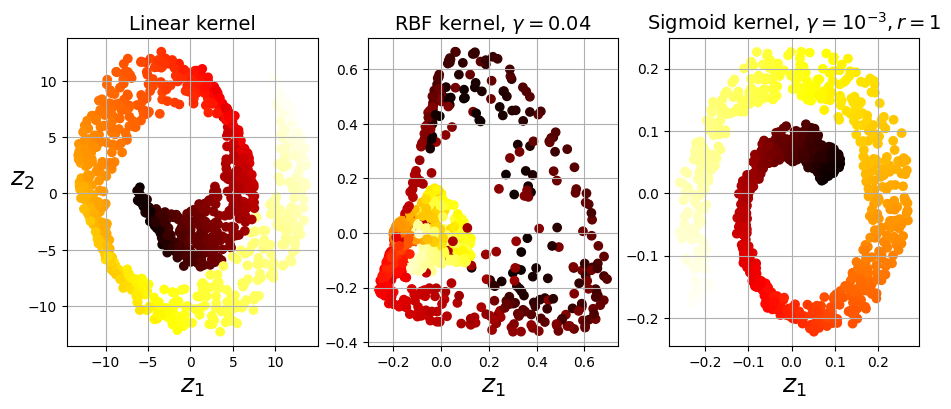

In [20]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
#save_fig("kernel_pca_plot")
plt.show()

La Figura muestra el rollo suizo, reducido a dos dimensiones usando un núcleo lineal (equivalente a simplemente usar la clase *PCA*), un núcleo RBF y un núcleo sigmoide (Logístico).

### kPCA: Definiendo el kernel y sus hiperparámetros

- Como kPCA es un algoritmo de aprendizaje no supervisado, *no existe una medida de rendimiento obvia para ayudarlo a seleccionar los mejores valores de kernel e hiperparámetros*.

- Sin embargo, la reducción de dimensionalidad es a menudo un paso de preparación para una tarea de aprendizaje supervisada (por ejemplo, clasificación), por lo que simplemente puede usar la **búsqueda de cuadrícula** para seleccionar el núcleo y los hiperparámetros conducen al mejor rendimiento en esa tarea.

**Ejemplo:** el siguiente código crea una guía de dos pasos para la clasificación de la base de datos Mnist.

- Primero reduciendo la dimensionalidad a dos dimensiones usando kPCA, luego aplicando Regresión logística para la clasificación.

- Se utiliza *GridSearchCV* para encontrar el mejor valor de kernel y gamma para kPCA para obtener la mejor precisión de clasificación al final de la guía:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

Los mejores kernels e hiperparámetros están disponibles a través de la variable *best_params_*:

In [22]:
print(grid_search.best_params_)

{'kpca__gamma': np.float64(0.03), 'kpca__kernel': 'rbf'}


**Tal vez se pregunte cómo realizar la reconstrucción de una instancia proyectada con kPCA?**.

- Una solución es entrenar un modelo de regresión supervisado, con las instancias proyectadas como el conjunto de entrenamiento y las instancias originales como los objetivos.

- Scikit-Learn lo hará automáticamente si configura *fit_inverse_transform = True*, ([pre-image problem](https://www.aaai.org/Papers/ICML/2003/ICML03-055.pdf)) como se muestra en el siguiente código:

In [23]:
from sklearn.metrics import mean_squared_error

rbf_pca    = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced  = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimage)

32.78630879576612

Podemos usar GridSearchCV para encontrar el núcleo y los hiperparámetros que minimizan este error de reconstrucción pre-imagen.

## t-distributed stochastic neighborhood embedding

- [t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwA) es de los algoritmos más potentes en reducción de dimensión dado que permite unir los principios de manifold learning y probabilidades, para lidear con el problema de concentración de las normas (métricas en espacios de alta dimensión se distribuyen muy diferente a métricas en espacios de baja dimensión).


![gifpca](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)



- t-SNE busca minimizar la diferencia entre las funciones de probabilidad del espacio original (alta dimensión) y el espacio reducido (baja dimensión), evitando el problema de la concentración de la norma.


- La similitud es modelada como una distribución Gaussiana, tal que la probabilidad condicional $p_{n'|n}$ que define si  $\mathbf{x}_n$ selecciona a $\mathbf{x}_{n'}$ como su vecino es:

\begin{equation}
p_{n'|n} = \frac{\exp(-\|\mathbf{x}_n - \mathbf{x}_{n'}\|^2 / 2\sigma_n^2)}{\sum_{k \neq n} \exp(-\|\mathbf{x}_n - \mathbf{x}_k\|^2 / 2\sigma_n^2)},
\end{equation}

donde $\sigma_n\in \mathbb{R}^+$.

La probabilidad conjunta se puede definir como :

\begin{equation}
p_{nn'} = \frac{p_{n'|n} + p_{n|n'}}{2N}.
\end{equation}



- Para el espacio de baja dimensión se utiliza un distribución t-Student con un grado de libertad (distribución de Cauchy).

- La probabilidad conjunta $q_{nn'}$ que modela si $\mathbf{y}_n$ y $\mathbf{z}_{n'}$ están cercanos es dada por:

\begin{equation}
q_{nn'} = \frac{(1 + \|\mathbf{z}_n - \mathbf{z}_{n'}\|^2)^{-1}}{\sum_{k \neq l} (1 + \|\mathbf{z}_k - \mathbf{z}_l\|^2)^{-1}}.
\end{equation}


- t-SNE minimiza la divergencia de  Kullback-Leibler (KL) entre $P = \{p_{nn'}\}$ y $Q = \{q_{nn'}\}$:

\begin{equation}
\text{KL}(P \| Q) = \sum_{n \neq n'} p_{nn'} \log \left( \frac{p_{nn'}}{q_{nn'}} \right).
\end{equation}

- La minización se resuelve convencionalmente por métodos de gradiente.

- Es importante resaltar que el ancho de bando en el espacio de alta dimensión se fija por muestra, fijando un valor de entropia común (perplexity).




In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity= 20, random_state=42,init='pca')
X_reduced_tsne = tsne.fit_transform(X)

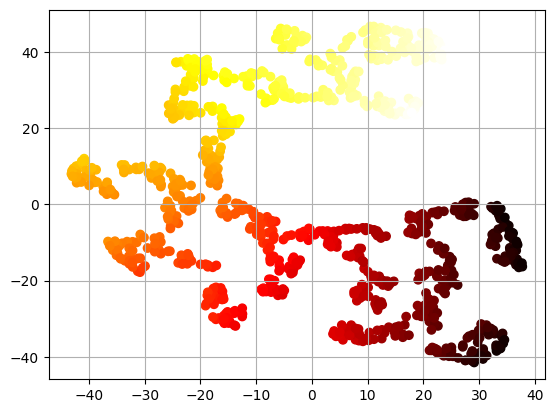

In [25]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


## Uniform Manifold Approximation and Projection (UMAP)

![gifumap](https://umap-learn.readthedocs.io/en/latest/_images/aligned_umap_pendigits_anim.gif)

- UMAP es una técnica de reducción de dimensión que modela el espacio de alta dimensión como estructura topológica difusa y la optimiza en el espacio de baja dimensión preservando distancias globales y locales.

- UMAP construye un grafo ponderado para representar la estructura topológica difusa.

- La probabilidad $p_{nn'}$ que representa el peso del borde entre $\mathbf{x}_n$ and $\mathbf{x}_{n'}$ esta dada por:

\begin{equation}
p_{nn'} = \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_{n'}\| - \rho_n}{\sigma_n}\right),
\end{equation}

- $\rho_n$ es la distancia al vecino más cercano de $\mathbf{x}_n$, lo que asegura que las distancias locales no se ven afectadas por ruido.
    
- $\sigma_n$ se determina por una un número fijo de vecinos.


- La relación difusa se vuelve simétrica como:

\begin{equation}
\tilde{p}_{nn'} = p_{nn'} + p_{n'n} - p_{nn'} p_{n'n}.
\end{equation}



- Las relaciones en el espacio de baja dimensión se fijan mediante una distribución t-student de cola pesada:

\begin{equation}
q_{nn'} = \left(1 + a \|\mathbf{z}_n - \mathbf{z}_{n'}\|^{2b}\right)^{-1},
\end{equation}

con $a$ y $b$ como parámetros de la distribución. Generalmente se fijan en 1.


- UMAP minimiza la entropía cruzada :

\begin{equation}
C(P;Q) = \sum_{n \neq n'} \left( -\tilde{p}_{nn'} \log(q_{nn'}) - (1 - \tilde{p}_{nn'}) \log(1 - q_{nn'}) \right).
\end{equation}

- Convencionalmente se utilizan métodos de gradiente para resolver la optimización.

In [26]:
!pip install umap-learn #librería umap
!pip install datashader bokeh holoviews #gráficos umap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.7 MB/s eta 0:00:00


In [27]:
import umap
import umap.plot

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,

In [28]:
red = umap.UMAP(n_components=2,n_neighbors=40, min_dist=0.2)
X_reduced_umap = red.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


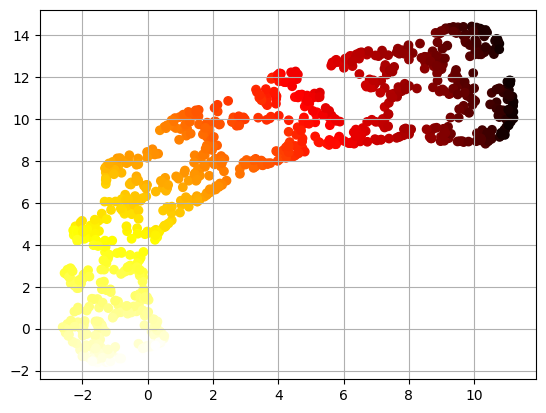

In [29]:
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


- UMAP presenta una serie de métodos para [gráficos interactivos](https://umap-learn.readthedocs.io/en/latest/plotting.html)

<Axes: >

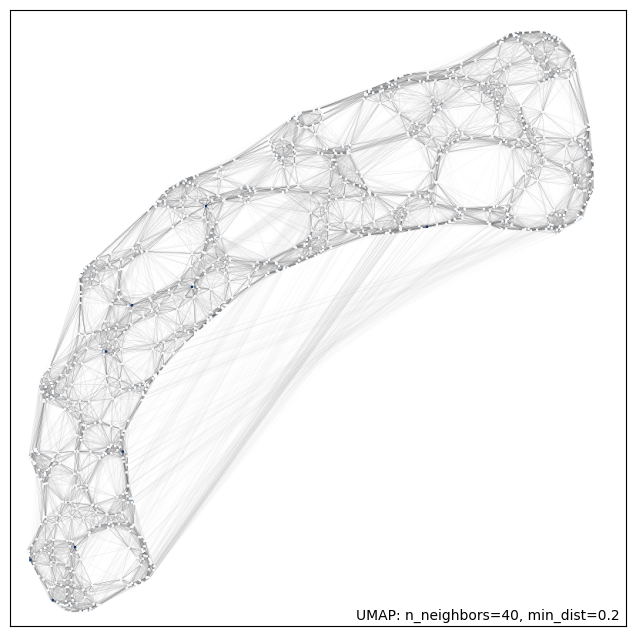

In [30]:
umap.plot.connectivity(red, show_points=True)

/usr/local/lib/python3.11/dist-packages/umap/plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

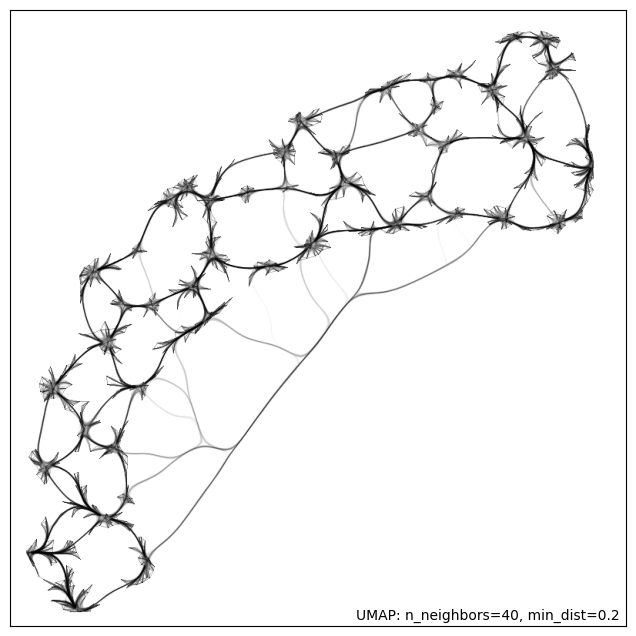

In [31]:
umap.plot.connectivity(red, edge_bundling='hammer')

# Ejercicio 3



1.  Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

2. Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.


In [32]:
#Ayuda de código
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)


In [33]:
#graficar 2D con imágenes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

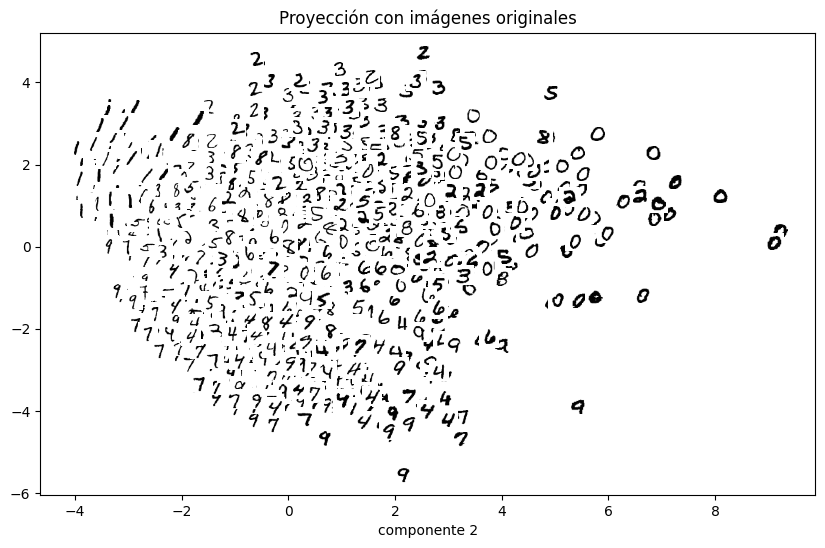

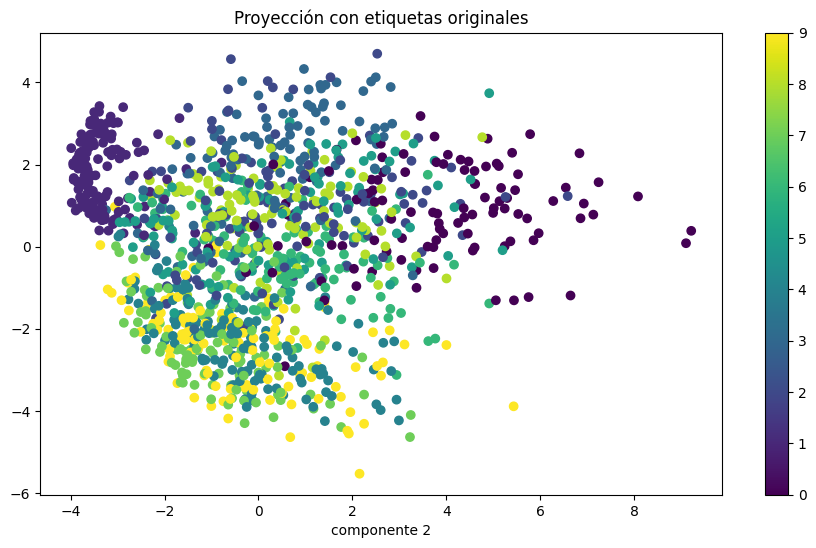

In [34]:
plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con imágenes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con etiquetas originales')
plt.colorbar()
plt.show()

In [35]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)


(80, 784)


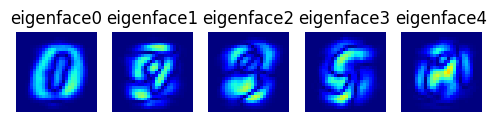

In [36]:
n_rows = 1
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
#resolución imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

**EJERCICIO 3:**

# Eigenfaces y PCA: Algoritmos de Reducción de Dimensión

## ¿Qué son los Eigenfaces?

**Eigenfaces** es un algoritmo específico para reconocimiento facial que utiliza PCA como base matemática. El término "eigenface" significa literalmente "cara propia" o "cara característica".

### Funcionamiento:
1. **Recopilación**: Se toman múltiples imágenes faciales del mismo tamaño
2. **Vectorización**: Cada imagen se convierte en un vector unidimensional
3. **Aplicación de PCA**: Se calculan los componentes principales (eigenfaces)
4. **Proyección**: Las caras se representan como combinaciones lineales de estos eigenfaces

## Comparación: Eigenfaces vs PCA

| Aspecto | PCA (General) | Eigenfaces |
|---------|---------------|------------|
| **Dominio** | Algoritmo general para cualquier tipo de datos | Aplicación específica de PCA para imágenes faciales |
| **Objetivo** | Reducir dimensionalidad preservando máxima varianza | Crear representación compacta de rostros para reconocimiento |
| **Datos de entrada** | Cualquier matriz de datos numéricos | Imágenes faciales normalizadas |
| **Componentes** | Componentes principales abstractos | Eigenfaces (imágenes que parecen rostros fantasmales) |
| **Interpretación** | Direcciones de máxima varianza en el espacio original | Características faciales fundamentales |

## Relación entre ambos

**Eigenfaces ES PCA aplicado a rostros**. La diferencia principal es el contexto y la interpretación:

- **PCA** es la técnica matemática subyacente
- **Eigenfaces** es la implementación específica para reconocimiento facial
- Los eigenfaces son los eigenvectors de la matriz de covarianza de las imágenes faciales
- Ambos buscan reducir dimensionalidad manteniendo la información más relevante

## Ventajas de Eigenfaces
- Reducción drástica de dimensionalidad (de miles de píxeles a decenas de componentes)
- Eficiencia computacional en reconocimiento
- Robustez ante variaciones menores de iluminación y expresión

Librerías cargadas correctamente!
Dimensiones de los datos de entrenamiento muestreados: (1200, 784)
Dimensiones de las etiquetas de entrenamiento muestreadas: (1200,)

Aplicando técnicas de reducción de dimensionalidad...
1. Aplicando PCA...
   Varianza explicada: 0.1680
2. Aplicando Kernel PCA (RBF)...
3. Aplicando t-SNE...
4. Aplicando UMAP...
Todas las técnicas de reducción aplicadas exitosamente!

Realizando clustering con K-Means y calculando coeficientes de silueta...

Procesando PCA...
   Coeficiente de silueta: 0.3523

Procesando Kernel PCA (RBF)...
   Coeficiente de silueta: 0.3523

Procesando t-SNE...
   Coeficiente de silueta: 0.4290

Procesando UMAP...
   Coeficiente de silueta: 0.4900

Generando visualizaciones...


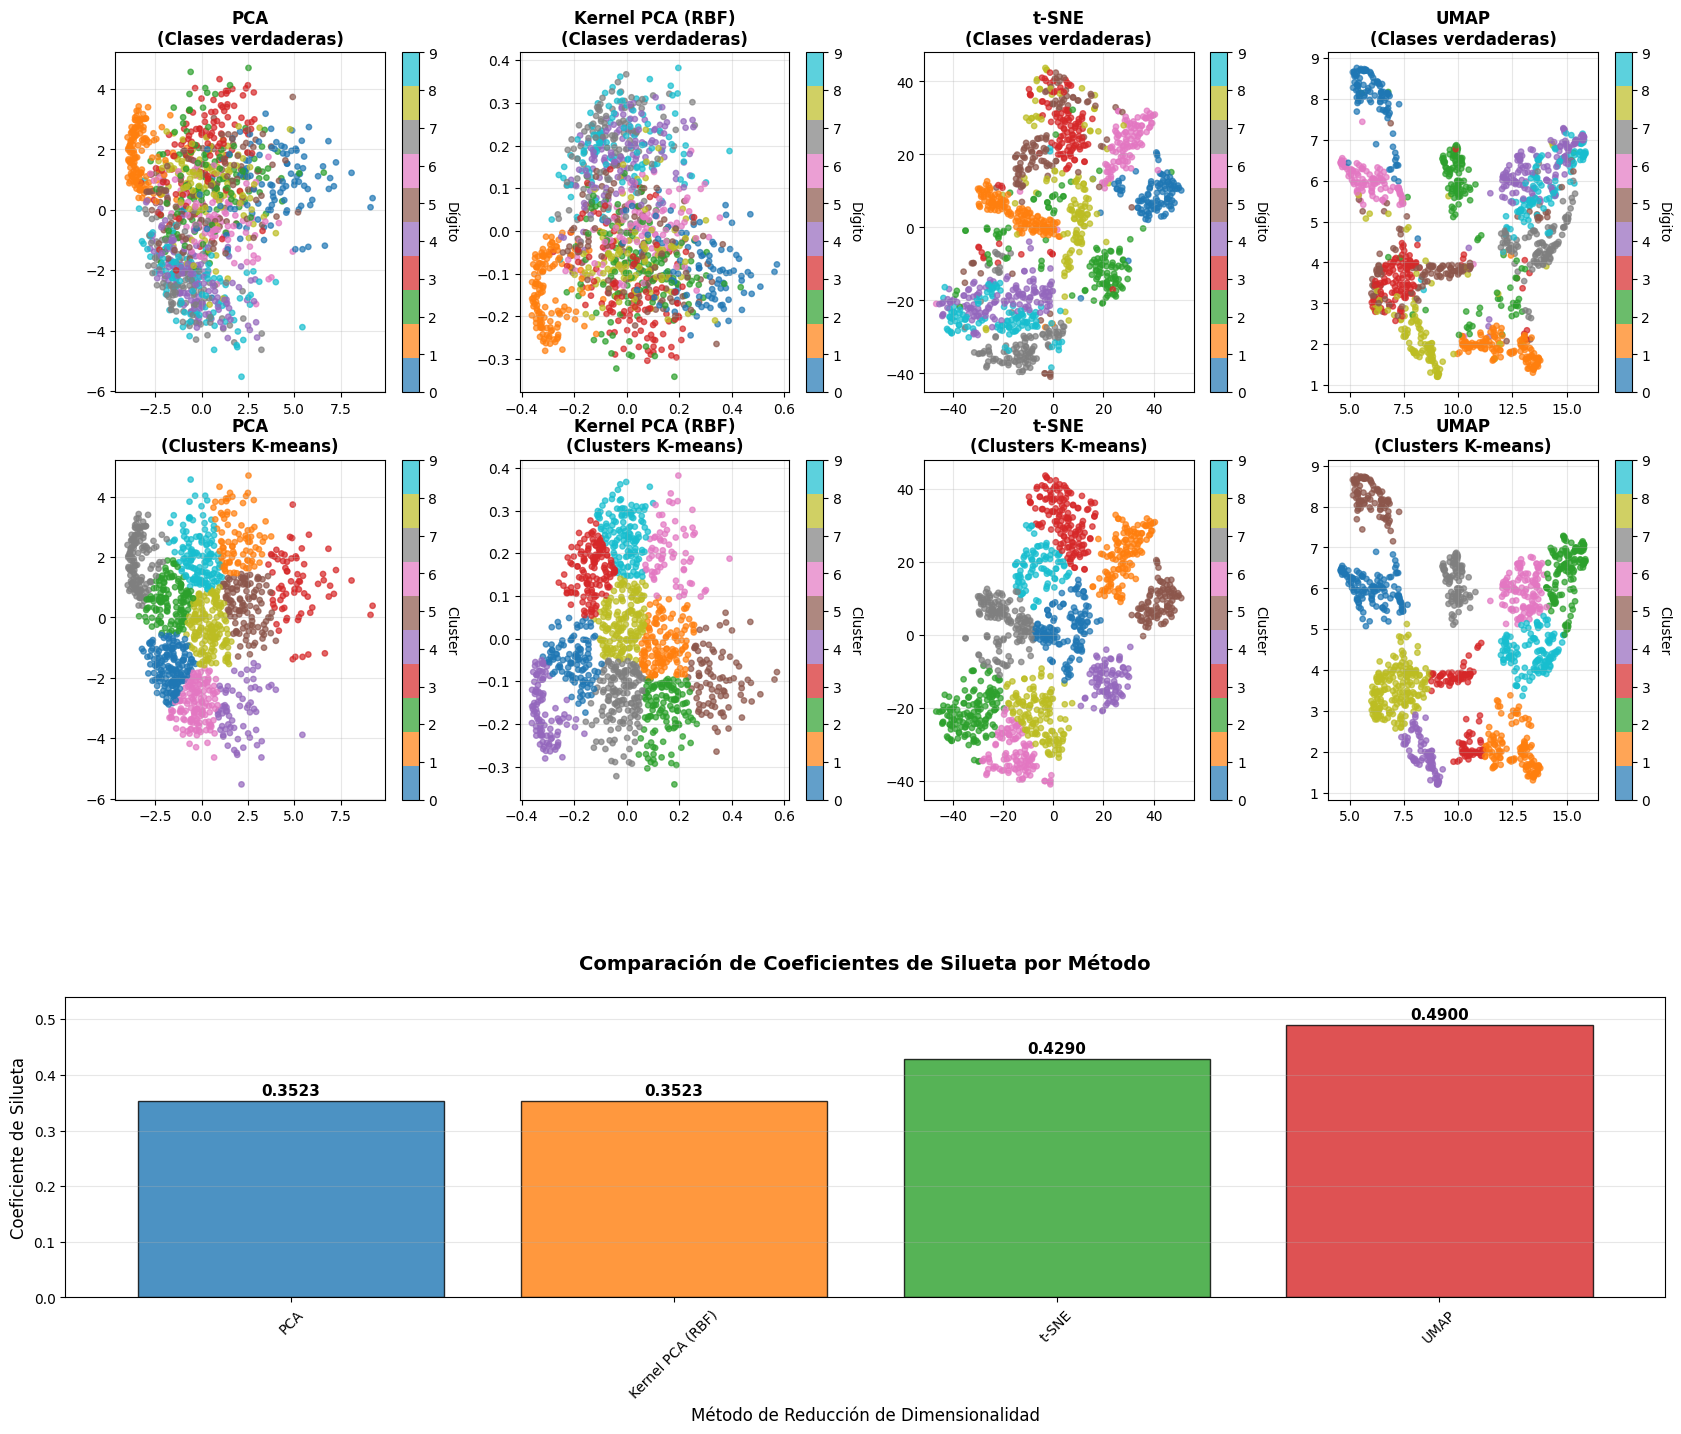


ANÁLISIS DETALLADO POR MÉTODO

🔹 PCA:
   • Coeficiente de silueta: 0.3523
   • Número de clusters encontrados: 10
   • Distribución de puntos por cluster: {np.int32(0): np.int64(164), np.int32(1): np.int64(88), np.int32(2): np.int64(133), np.int32(3): np.int64(71), np.int32(4): np.int64(66), np.int32(5): np.int64(112), np.int32(6): np.int64(143), np.int32(7): np.int64(132), np.int32(8): np.int64(156), np.int32(9): np.int64(135)}
   • Inercia (WCSS): 1195.95

🔹 KERNEL PCA (RBF):
   • Coeficiente de silueta: 0.3523
   • Número de clusters encontrados: 10
   • Distribución de puntos por cluster: {np.int32(0): np.int64(109), np.int32(1): np.int64(135), np.int32(2): np.int64(121), np.int32(3): np.int64(136), np.int32(4): np.int64(101), np.int32(5): np.int64(86), np.int32(6): np.int64(71), np.int32(7): np.int64(150), np.int32(8): np.int64(159), np.int32(9): np.int64(132)}
   • Inercia (WCSS): 7.11

🔹 T-SNE:
   • Coeficiente de silueta: 0.4290
   • Número de clusters encontrados: 10
   • Dis

In [41]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow import keras
import umap
import warnings
warnings.filterwarnings('ignore')

print("Librerías cargadas correctamente!")

# =============================================================================
# CARGAR Y PREPARAR DATOS MNIST
# =============================================================================

# Cargar el dataset completo de MNIST
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# Aplanar las imágenes y normalizar
X_full = X_train_full.reshape(X_train_full.shape[0], -1) / 255.0
y_full = y_train_full

# Aplicar el submuestreo
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.98, random_state=123
)

print(f"Dimensiones de los datos de entrenamiento muestreados: {X_train.shape}")
print(f"Dimensiones de las etiquetas de entrenamiento muestreadas: {y_train.shape}")

# =============================================================================
# APLICAR TÉCNICAS DE REDUCCIÓN DE DIMENSIONALIDAD
# =============================================================================

print("\nAplicando técnicas de reducción de dimensionalidad...")

# 1. PCA lineal a 2 componentes
print("1. Aplicando PCA...")
pca_mnist = PCA(n_components=2, random_state=42)
X_reduced_pca_mnist = pca_mnist.fit_transform(X_train)
print(f"   Varianza explicada: {pca_mnist.explained_variance_ratio_.sum():.4f}")

# 2. Kernel PCA (RBF) a 2 componentes
print("2. Aplicando Kernel PCA (RBF)...")
rbf_pca_mnist = KernelPCA(n_components=2, kernel="rbf", gamma=0.005, random_state=42)
X_reduced_rbf_pca_mnist = rbf_pca_mnist.fit_transform(X_train)

# 3. t-SNE a 2 componentes
print("3. Aplicando t-SNE...")
tsne_mnist = TSNE(n_components=2, perplexity=30, random_state=42,
                  init='pca', learning_rate='auto', n_iter=1000)
X_reduced_tsne_mnist = tsne_mnist.fit_transform(X_train)

# 4. UMAP a 2 componentes
print("4. Aplicando UMAP...")
umap_mnist = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_reduced_umap_mnist = umap_mnist.fit_transform(X_train)

print("Todas las técnicas de reducción aplicadas exitosamente!")

# =============================================================================
# CLUSTERING CON K-MEANS Y ANÁLISIS DE SILUETA
# =============================================================================

print("\nRealizando clustering con K-Means y calculando coeficientes de silueta...")

# Definir el número de clusters (10 para los dígitos 0-9)
n_clusters = 10

# Diccionario para almacenar resultados
results = {}
reduced_data = {
    'PCA': X_reduced_pca_mnist,
    'Kernel PCA (RBF)': X_reduced_rbf_pca_mnist,
    't-SNE': X_reduced_tsne_mnist,
    'UMAP': X_reduced_umap_mnist
}

# Aplicar K-means y calcular coeficiente de silueta para cada método
for method_name, data in reduced_data.items():
    print(f"\nProcesando {method_name}...")

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=300, n_init=10)
    cluster_labels = kmeans.fit_predict(data)

    # Calcular coeficiente de silueta
    silhouette_avg = silhouette_score(data, cluster_labels)

    # Almacenar resultados
    results[method_name] = {
        'data': data,
        'labels': cluster_labels,
        'silhouette_score': silhouette_avg,
        'kmeans_model': kmeans
    }

    print(f"   Coeficiente de silueta: {silhouette_avg:.4f}")

# =============================================================================
# VISUALIZACIÓN COMPARATIVA
# =============================================================================

print("\nGenerando visualizaciones...")

# Crear figura grande para mostrar todos los resultados
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Primera fila: Visualizar datos reducidos coloreados por clases verdaderas
for i, (method_name, result) in enumerate(results.items()):
    data = result['data']

    scatter = axes[0, i].scatter(data[:, 0], data[:, 1], c=y_train,
                                cmap='tab10', alpha=0.7, s=15)
    axes[0, i].set_title(f"{method_name}\n(Clases verdaderas)", fontsize=12, fontweight='bold')
    axes[0, i].grid(True, alpha=0.3)

    # Añadir colorbar
    cbar = plt.colorbar(scatter, ax=axes[0, i])
    cbar.set_label('Dígito', rotation=270, labelpad=15)

# Segunda fila: Visualizar clusters de K-means
for i, (method_name, result) in enumerate(results.items()):
    data = result['data']
    labels = result['labels']

    scatter = axes[1, i].scatter(data[:, 0], data[:, 1], c=labels,
                                cmap='tab10', alpha=0.7, s=15)
    axes[1, i].set_title(f"{method_name}\n(Clusters K-means)", fontsize=12, fontweight='bold')
    axes[1, i].grid(True, alpha=0.3)

    # Añadir colorbar
    cbar = plt.colorbar(scatter, ax=axes[1, i])
    cbar.set_label('Cluster', rotation=270, labelpad=15)

# Tercera fila: Gráfico de barras con coeficientes de silueta
# Eliminar subplots no necesarios y crear uno grande
for j in range(1, 4):
    fig.delaxes(axes[2, j])

ax_bar = axes[2, 0]
ax_bar.set_position([0.1, 0.05, 0.8, 0.2])

methods = list(results.keys())
silhouette_scores = [results[method]['silhouette_score'] for method in methods]

# Crear barras con colores diferentes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = ax_bar.bar(methods, silhouette_scores, color=colors, alpha=0.8, edgecolor='black')

ax_bar.set_title('Comparación de Coeficientes de Silueta por Método',
                fontsize=14, fontweight='bold', pad=20)
ax_bar.set_ylabel('Coeficiente de Silueta', fontsize=12)
ax_bar.set_xlabel('Método de Reducción de Dimensionalidad', fontsize=12)
ax_bar.grid(True, alpha=0.3, axis='y')

# Añadir valores encima de las barras
for i, (bar, score) in enumerate(zip(bars, silhouette_scores)):
    ax_bar.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.005,
                f'{score:.4f}', ha='center', va='bottom',
                fontweight='bold', fontsize=11)

# Mejorar legibilidad
ax_bar.tick_params(axis='x', rotation=45)
ax_bar.set_ylim(0, max(silhouette_scores) * 1.1)

plt.tight_layout()
plt.show()

# =============================================================================
# ANÁLISIS DETALLADO POR MÉTODO
# =============================================================================

print("\n" + "="*70)
print("ANÁLISIS DETALLADO POR MÉTODO")
print("="*70)

for method_name, result in results.items():
    print(f"\n🔹 {method_name.upper()}:")
    print(f"   • Coeficiente de silueta: {result['silhouette_score']:.4f}")

    # Calcular estadísticas adicionales
    labels = result['labels']
    unique_labels, counts = np.unique(labels, return_counts=True)

    print(f"   • Número de clusters encontrados: {len(unique_labels)}")
    print(f"   • Distribución de puntos por cluster: {dict(zip(unique_labels, counts))}")

    # Calcular inercia (suma de distancias cuadradas a centroides)
    kmeans_model = result['kmeans_model']
    print(f"   • Inercia (WCSS): {kmeans_model.inertia_:.2f}")

# =============================================================================
# RESUMEN DE RESULTADOS Y RANKING
# =============================================================================

print("\n" + "="*70)
print("RANKING Y RESUMEN DE RESULTADOS")
print("="*70)

# Ordenar métodos por coeficiente de silueta (de mayor a menor)
sorted_results = sorted(results.items(), key=lambda x: x[1]['silhouette_score'], reverse=True)

print(f"{'Pos.':<5} {'Método':<18} {'Coef. Silueta':<15} {'Calidad':<12}")
print("-" * 70)

def get_quality_label(score):
    if score >= 0.5:
        return "Excelente"
    elif score >= 0.3:
        return "Buena"
    elif score >= 0.1:
        return "Regular"
    else:
        return "Pobre"

for rank, (method_name, result) in enumerate(sorted_results, 1):
    score = result['silhouette_score']
    quality = get_quality_label(score)
    medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "

    print(f"{medal} {rank:<3} {method_name:<18} {score:<15.4f} {quality:<12}")

# =============================================================================
# INTERPRETACIÓN Y CONCLUSIONES
# =============================================================================

print("\n" + "="*70)
print("INTERPRETACIÓN DE RESULTADOS")
print("="*70)

best_method = sorted_results[0][0]
best_score = sorted_results[0][1]['silhouette_score']

print(f"""
📊 INTERPRETACIÓN DEL COEFICIENTE DE SILUETA:
   • Rango: [-1, 1]
   • Valores cercanos a 1: clusters muy bien separados
   • Valores cercanos a 0: clusters superpuestos
   • Valores negativos: puntos mal asignados a clusters

🏆 MEJOR MÉTODO: {best_method}
   • Coeficiente de silueta: {best_score:.4f}
   • Esto indica una {get_quality_label(best_score).lower()} separación de clusters

🔍 OBSERVACIONES:
   • MNIST tiene 10 clases naturales (dígitos 0-9)
   • Métodos no lineales suelen funcionar mejor para este dataset
   • t-SNE y UMAP son especialmente buenos para visualización
   • PCA puede ser limitado por su naturaleza lineal

📈 RECOMENDACIONES:
   • Para visualización: usar el método con mayor coeficiente de silueta
   • Para análisis posterior: considerar tanto la calidad como la interpretabilidad
   • Para aplicaciones en tiempo real: balancear calidad vs velocidad de cómputo
""")

print("="*70)
print(f"Análisis completado con {X_train.shape[0]} muestras de MNIST")
print("="*70)

# Análisis de Técnicas de Reducción de Dimensionalidad

## 1. PCA (Principal Component Analysis) - Superior Izquierda

**Lo que vemos:** Un patrón circular con colores que van del amarillo al rojo oscuro, formando anillos concéntricos.

**Explicación:**
- PCA es una técnica **lineal** que busca las direcciones de máxima varianza
- Preserva bien las relaciones lineales pero tiene dificultades con estructuras no lineales
- En este caso, parece estar capturando una estructura circular/anular del dataset original
- La gradación de colores sugiere que hay una progresión suave en los datos originales
- **Limitación:** No puede "desenrollar" estructuras complejas no lineales

## 2. Kernel PCA (RBF) - Superior Derecha

**Lo que vemos:** Los datos se han "desenrollado" parcialmente, mostrando una estructura más extendida con forma de media luna o arco.

**Explicación:**
- Kernel PCA usa el **kernel RBF (Radial Basis Function)** para mapear datos a un espacio de mayor dimensión
- Puede capturar relaciones **no lineales** que PCA tradicional no puede
- Ha logrado "abrir" la estructura circular, revelando la geometría subyacente
- La separación de colores es más clara, indicando mejor preservación de la estructura local
- **Ventaja:** Maneja mejor las relaciones no lineales complejas

## 3. t-SNE (t-Distributed Stochastic Neighbor Embedding) - Inferior Izquierda

**Lo que vemos:** Clusters muy bien definidos y separados, con colores agrupados de manera clara.

**Explicación:**
- t-SNE se especializa en **preservar relaciones locales** y crear visualizaciones interpretables
- Excelente para formar clusters bien separados y visualizar agrupaciones
- Cada color representa un grupo claramente diferenciado
- **Fortaleza:** Ideal para exploración de datos y detección de clusters
- **Limitación:** Puede crear separaciones artificiales y no preserva distancias globales

## 4. UMAP (Uniform Manifold Approximation and Projection) - Inferior Derecha

**Lo que vemos:** Una estructura continua que parece un "Swiss roll" desenrollado, manteniendo la conectividad gradual de colores.

**Explicación:**
- UMAP balancea la **preservación de estructura local Y global**
- Mantiene la continuidad del gradiente de colores (estructura global)
- Permite ver la progresión natural de los datos sin crear separaciones artificiales
- **Ventaja clave:** Preserva tanto la topología local como las relaciones globales
- Más rápido que t-SNE y mejor para datasets grandes

## Comparación de Resultados

| Técnica | Estructura Capturada | Mejor Para |
|---------|---------------------|------------|
| **PCA** | Relaciones lineales básicas | Análisis rápido, reducción inicial |
| **Kernel PCA** | Relaciones no lineales moderadas | Cuando PCA es insuficiente |
| **t-SNE** | Clusters y agrupaciones locales | Exploración y visualización de clusters |
| **UMAP** | Balance estructura local-global | Visualización general y análisis exploratorio |

## Conclusión

Cada técnica revela aspectos diferentes del mismo dataset:
- **PCA:** Muestra la forma básica pero limitada por linealidad
- **Kernel PCA:** Mejora la captura de no linealidades
- **t-SNE:** Enfatiza la separación en grupos
- **UMAP:** Ofrece el mejor balance para entender la estructura completa

**Nota**: No use la libreria RAPIDS, porque me salian muchos errores cuando queria instalarla.